In [57]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [58]:
def load_img():
    blank_img = np.zeros((600, 600))
    font = cv2.FONT_HERSHEY_COMPLEX
    cv2.putText(blank_img, text = 'SAGAR', org = (50,300),
               fontFace = font, fontScale = 5, color = (255,255,255), thickness = 20)
    return blank_img

In [59]:
def display_img(img):
    fig = plt.figure(figsize = (12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = 'gray')

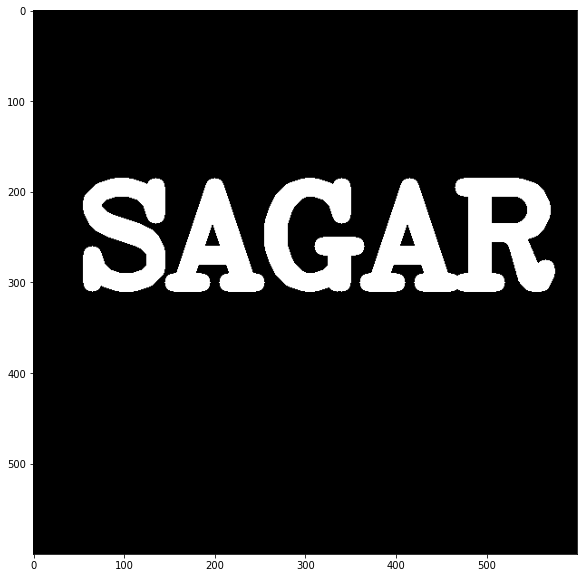

In [60]:
img = load_img()
display_img(img)

In [61]:
kernel = np.ones((5, 5), dtype=np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

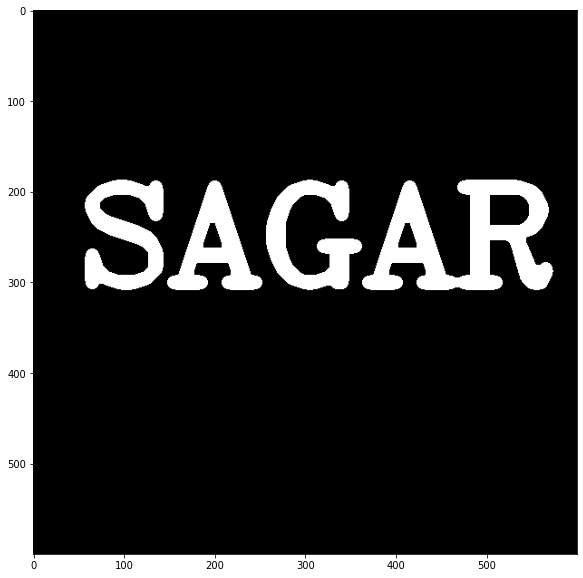

In [62]:
result = cv2.erode(img, kernel, iterations = 1)
display_img(result)

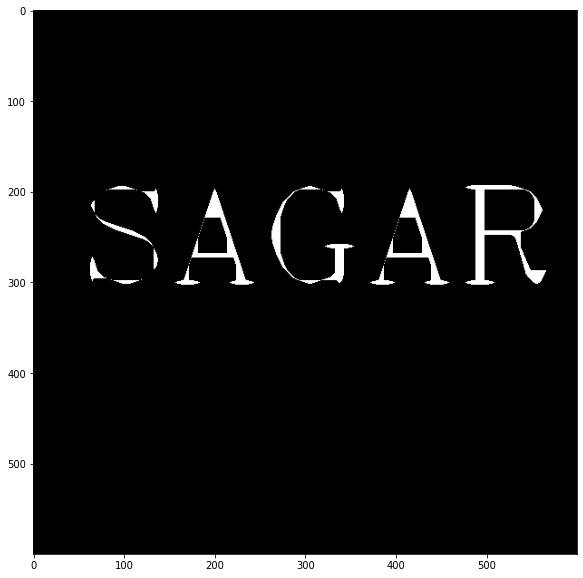

In [63]:
result = cv2.erode(img, kernel, iterations = 4)
display_img(result)

## Dilation: Opposite of Morphological, adds more white noise

In [64]:
img = load_img()

white_noise = np.random.randint(low=0, high=2, size=(600,600))
white_noise

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 1, 0],
       ...,
       [1, 0, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 0, 0]])

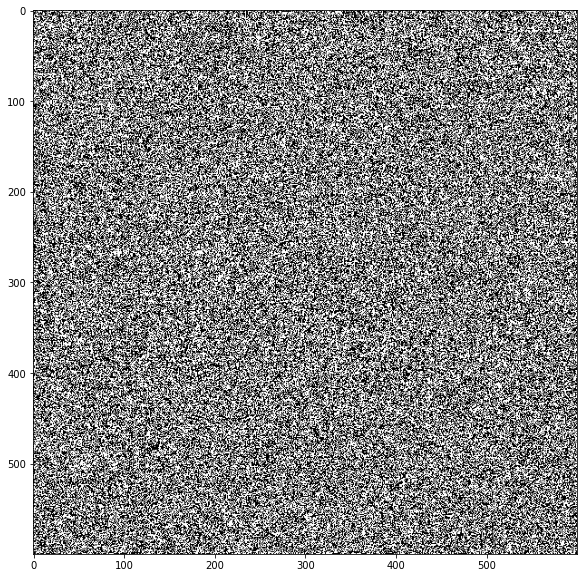

In [65]:
display_img(white_noise)

## Putting noise to image

In [66]:
img.max()

255.0

In [67]:
white_noise = white_noise * 255
white_noise

array([[255,   0,   0, ...,   0,   0,   0],
       [255, 255,   0, ..., 255, 255,   0],
       [255,   0,   0, ..., 255, 255,   0],
       ...,
       [255,   0,   0, ..., 255, 255,   0],
       [255,   0,   0, ..., 255,   0,   0],
       [255,   0,   0, ..., 255,   0,   0]])

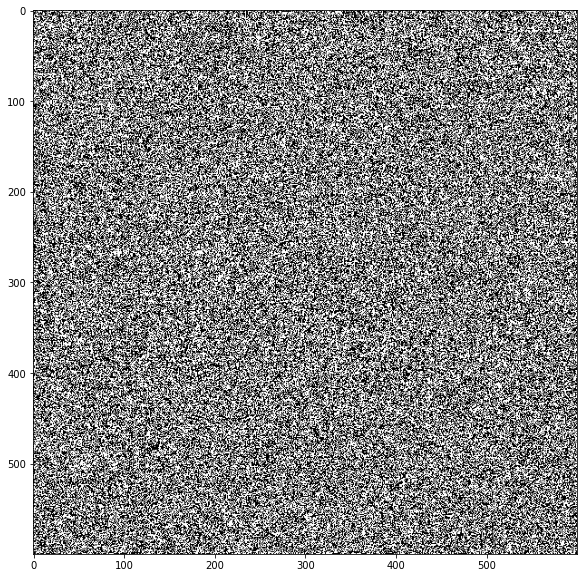

In [68]:
display_img(white_noise)

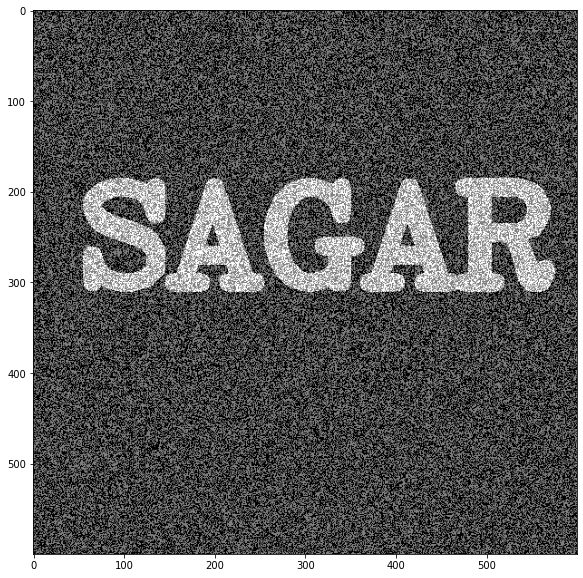

In [69]:
noise_img = white_noise + img
display_img(noise_img)

## Opening Technique to remove the noise

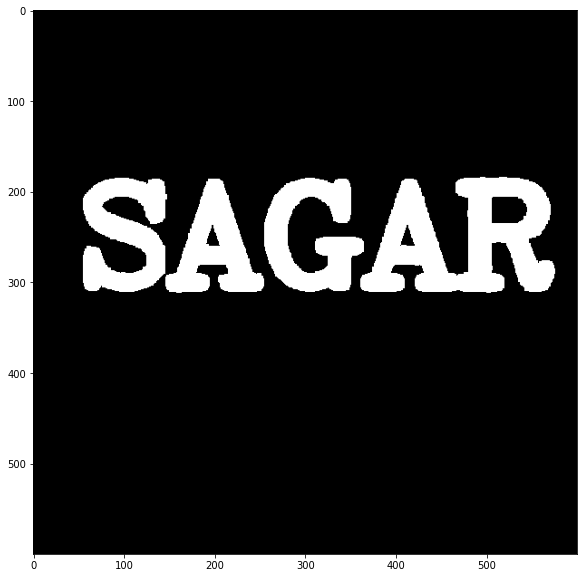

In [70]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)
display_img(opening)

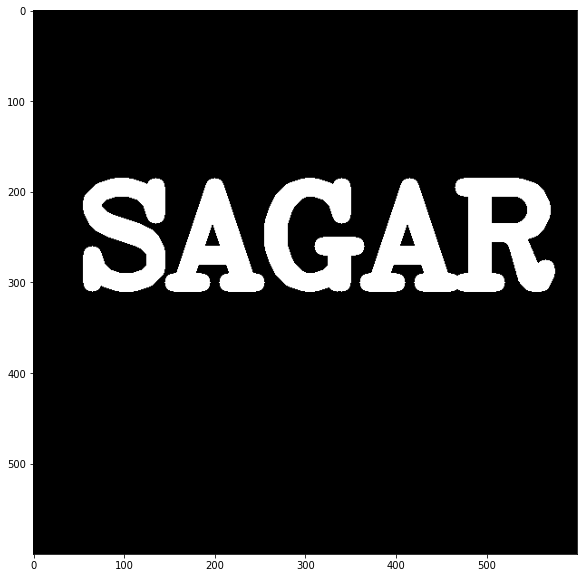

In [71]:
## Original Image

display_img(img)

## Foreground Noise

In [72]:
img = load_img()

black_noise = np.random.randint(0, 2, size = (600, 600))
black_noise

array([[1, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [73]:
black_noise = black_noise * -255
black_noise

array([[-255, -255,    0, ..., -255,    0,    0],
       [-255,    0,    0, ...,    0,    0, -255],
       [   0,    0,    0, ...,    0, -255,    0],
       ...,
       [-255,    0,    0, ...,    0,    0,    0],
       [   0, -255, -255, ...,    0, -255,    0],
       [   0,    0,    0, ...,    0,    0, -255]])

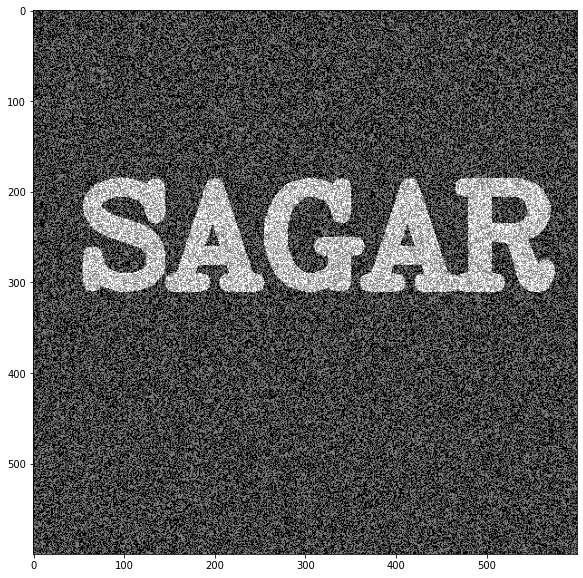

In [74]:
black_noise_img = img + black_noise
display_img(black_noise_img)

In [75]:
black_noise_img.min()

-255.0

In [76]:
## So, correcting code:


black_noise_img[black_noise_img == -255] = 0
black_noise_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [77]:
black_noise_img.min()

0.0

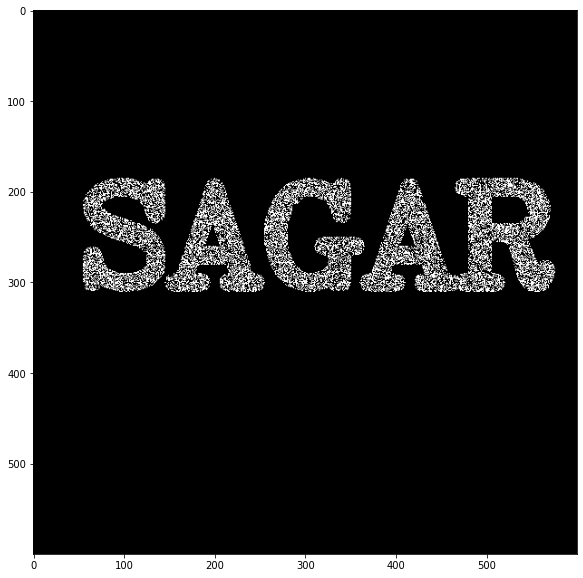

In [78]:
display_img(black_noise_img)

## Closing Noise

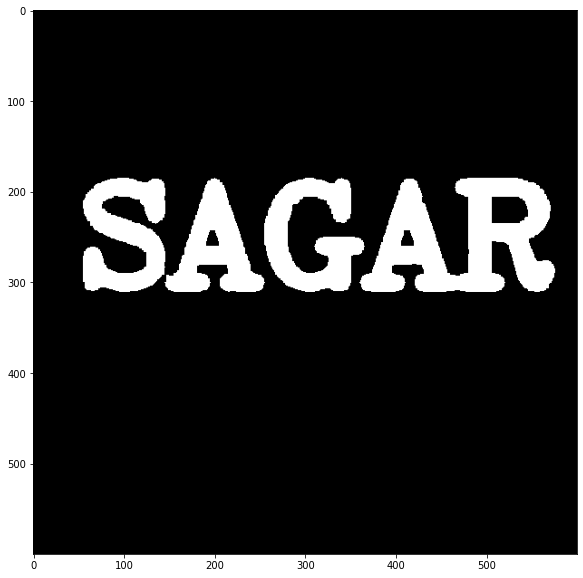

In [79]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)
display_img(closing)

## Morphological Gradient = Diff between dilation and erosion of image

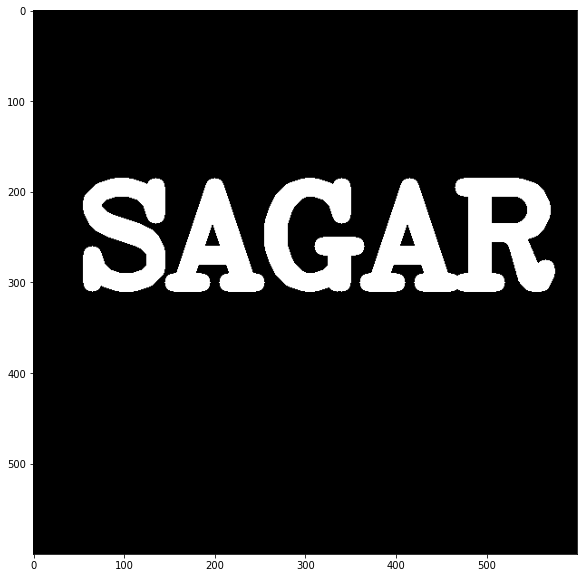

In [80]:
img = load_img()
display_img(img)

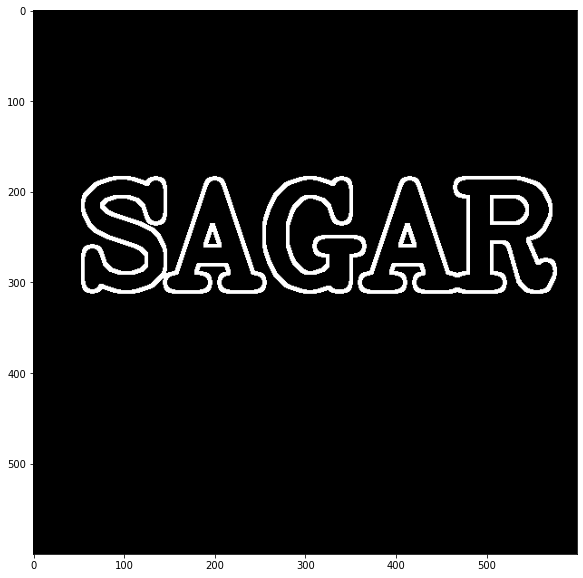

In [81]:
## Similar to Edge Detection

gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
display_img(gradient)